# Synaptic transmission

[![Download JupyterNotebook](https://img.shields.io/badge/Download-Notebook-orange?style=for-the-badge&logo=Jupyter)](https://raw.githubusercontent.com/ANNarchy/ANNarchy.github.io/master/notebooks/SynapticTransmission.ipynb) [![Download JupyterNotebook](https://img.shields.io/badge/Open_in-Colab-blue?style=for-the-badge&logo=Jupyter)](https://colab.research.google.com/github/ANNarchy/ANNarchy.github.io/blob/master/notebooks/SynapticTransmission.ipynb)

In [1]:
#!pip install ANNarchy


This notebook simply demonstrates the three main type of synaptic transmission for spiking neurons:

1. Instantaneous
2. Exponentially-decreasing
3. Alpha-shaped 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ANNarchy as ann

ANNarchy 5.0 (5.0.0) on linux (posix).


We use here a simple LIF neuron receving three types of projections (a, b, c). The conductance `g_a` uses instantaneous transmission, as it is reset to 0 after each step. `g_b` decreases exponentially with time following a first order ODE. `g_c` is integrated twice in `alpha_c`, leading to the alpha shape.

All methods use the exponential numerical method, as they are first order linear ODEs and can be solved exactly.

In [3]:
LIF = ann.Neuron(
    parameters = dict(
        tau = 20.,
        E_L = -70.,
        v_T = 0.,
        v_r = -58.,
        tau_b = 10.0,
        tau_c = 10.0,
    ),
    equations = [
        # Membrane potential
        ann.Variable('tau * dv/dt = (E_L - v) + g_a + g_b + alpha_c', init=-70.),
        
        # Exponentially decreasing
        ann.Variable('tau_b * dg_b/dt = -g_b', method='exponential'),
        
        # Alpha-shaped
        ann.Variable('tau_c * dg_c/dt = -g_c', method='exponential'),
        ann.Variable('tau_c * dalpha_c/dt = exp((tau_c - dt/2.0)/tau_c) * g_c - alpha_c', method='exponential'),
    ],
    spike="v >= v_T",
    reset="v = v_r",
    refractory = 2.0
)

The LIF neuron will receive a single spike at $t = 10$ ms, using the `SpikeSourceArray` specific population.

In [4]:
net = ann.Network()
inp = net.create(ann.SpikeSourceArray([10.]))
pop = net.create(1, LIF)

We implement three different projections between the same neurons, to highlight the three possible transmission mechanisms.

In [5]:
proj = net.connect(inp, pop, 'a')
proj.all_to_all(weights=1.0)

proj = net.connect(inp, pop, 'b')
proj.all_to_all(weights=1.0)

proj = net.connect(inp, pop, 'c')
proj.all_to_all(weights=1.0)

In [6]:
net.compile()

Compiling network 1...  

OK 


We monitor the three conductances:

In [7]:
m = net.monitor(pop, ['g_a', 'g_b', 'alpha_c'])

In [8]:
inp.clear()
net.simulate(100.)

In [9]:
data = m.get()

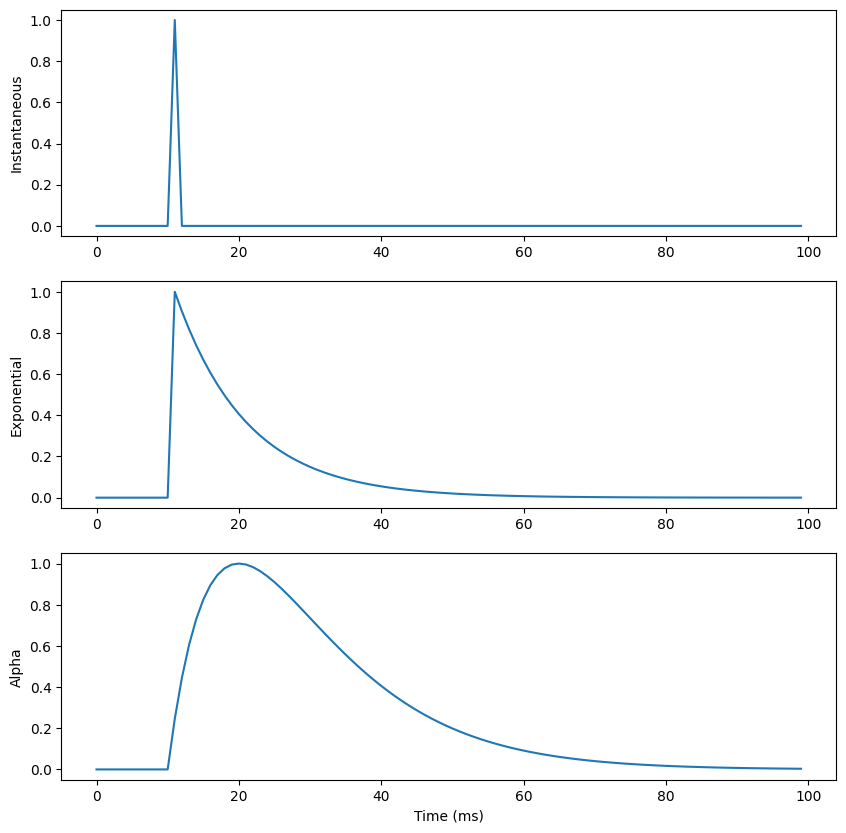

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(data['g_a'][:, 0])
plt.ylabel("Instantaneous")
plt.subplot(312)
plt.plot(data['g_b'][:, 0])
plt.ylabel("Exponential")
plt.subplot(313)
plt.plot(data['alpha_c'][:, 0])
plt.xlabel("Time (ms)")
plt.ylabel("Alpha")
plt.show()